In [1]:
% matplotlib inline

In [2]:
% config InlineBackend.figure_format = 'retina'

In [3]:
import os

In [4]:
os.chdir("..")

In [5]:
import numpy as np
import scipy as sp
import scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import pickle
from tqdm import tqdm
from sampling.utils import SamplingLogger, CoeffSamplingLogger
import sys
sys.path.append('./sampling')

In [6]:
sns.set_style("ticks")
sns.set_style("white")
sns.set_palette(sns.color_palette("dark", 8))
plt_colors = sns.color_palette()
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams.update({'font.size': 12})

In [113]:
fold_idx = "14"

In [114]:
# greedy_sat = pickle.load(open("results/fold_%s/sampling_greedy_sat.pkl" % fold_idx, "rb"))
# greedy_nosat = pickle.load(open("results/fold_%s/sampling_greedy_nosat.pkl" % fold_idx, "rb"))
random_sat = pickle.load(open("results/fold_%s/sampling_random_sat.pkl" % fold_idx, "rb"))
random_nosat = pickle.load(open("results/fold_%s/sampling_random_nosat.pkl" % fold_idx, "rb"))

In [115]:
coeff_greedy = pickle.load(open("results/fold_%s/coeff_sampling_greedy.pkl" % fold_idx, "rb"))
coeff_random = pickle.load(open("results/fold_%s/coeff_sampling_random.pkl" % fold_idx, "rb"))

In [116]:
df_train = pd.read_csv("results/fold_%s/sampling_train.csv" % fold_idx)
df_val = pd.read_csv("results/fold_%s/sampling_val.csv" % fold_idx)

In [117]:
df_results = pd.read_csv("results/fold_%s/test_results.csv" % fold_idx)

In [118]:
print(df_results["state_name"][0], len(df_results))

Maharashtra 39772


In [119]:
r2_score(df_results["true"], df_results["smoothed"])

0.23973324169974985

In [120]:
df = pd.concat([df_train, df_val])

In [121]:
sp.stats.pearsonr(df["true"], df["electrification"])[0]

-0.016977101190905633

In [122]:
np.std(df["electrification"])

0.10080613929668848

In [123]:
vmin = np.min(np.r_[df["true"], df["pred"]] - 0.5)
vmax = np.max(np.r_[df["true"], df["pred"]] + 0.5)

In [124]:
df_train_sub = df_train.iloc[:30,:]

In [125]:
opt_r2 = max(
  np.mean(np.array(random_sat.r2s_matrix)[:,-1]),
#   np.mean(np.array(greedy_sat.r2s_matrix)[:,-1]),
  np.mean(np.array(random_nosat.r2s_matrix)[:,-1]),
#   np.mean(np.array(greedy_nosat.r2s_matrix)[:,-1]),
)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


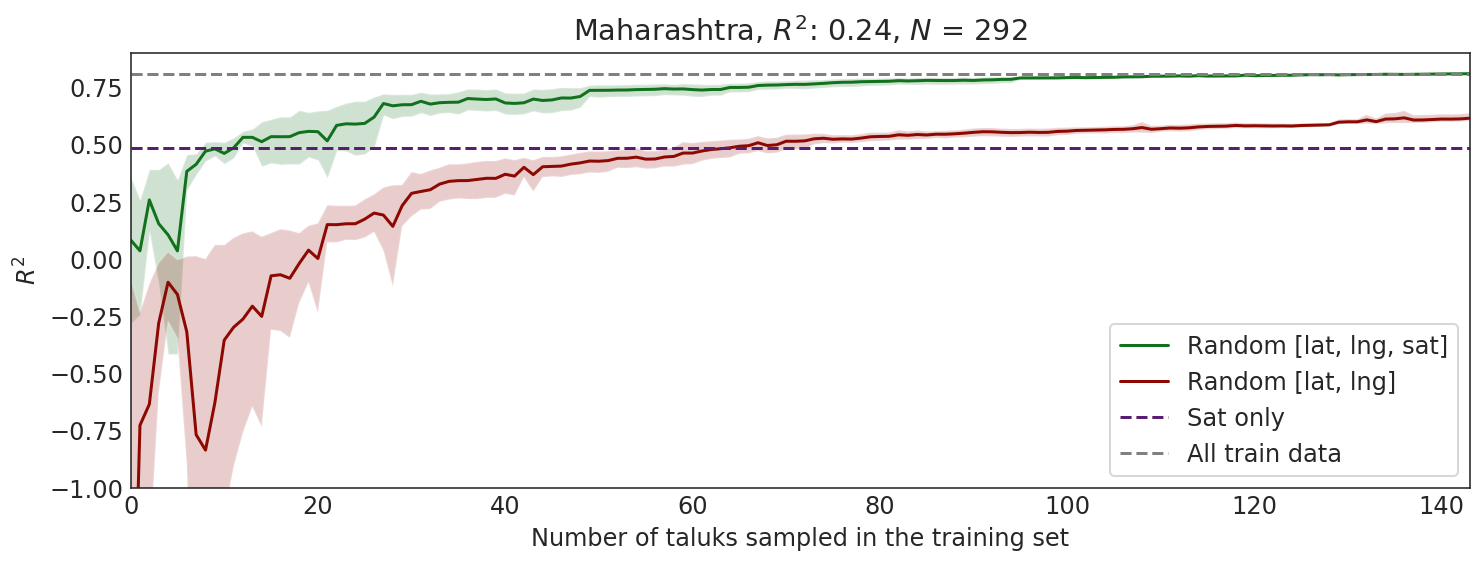

In [126]:
plt.figure(figsize=(12, 4))
# sns.tsplot(greedy_sat.r2s_matrix, condition="Greedy GP [lat, lng, sat]", color=plt_colors[0], ci=95)
# sns.tsplot(greedy_nosat.r2s_matrix, condition="Greedy GP [lat, lng]", color=plt_colors[1], ci=95)
sns.tsplot(random_sat.r2s_matrix, condition="Random [lat, lng, sat]", color=plt_colors[2], ci=95)
sns.tsplot(random_nosat.r2s_matrix, condition="Random [lat, lng]", color=plt_colors[3], ci=95)
plt.xlabel("Number of taluks sampled in the training set")
plt.ylabel("$R^2$")
plt.axhline(r2_score(df_val["true"], df_val["pred"]), ls="--", color=plt_colors[4], label="Sat only")
plt.axhline(opt_r2, ls="--", color="grey", label="All train data")
plt.ylim(-1, 0.9)
plt.title("%s, $R^2$: %.2f, $N$ = %d" % (df_results["state_name"][0], 
                                         r2_score(df_results["true"], df_results["smoothed"]),
                                         len(df_train) + len(df_val)))
plt.legend();

In [127]:
opt_mse = min(
  np.mean(np.array(random_sat.mses_matrix)[:,-1]),
#   np.mean(np.array(greedy_sat.mses_matrix)[:,-1]),
  np.mean(np.array(random_nosat.mses_matrix)[:,-1]),
#   np.mean(np.array(greedy_nosat.mses_matrix)[:,-1]),
)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


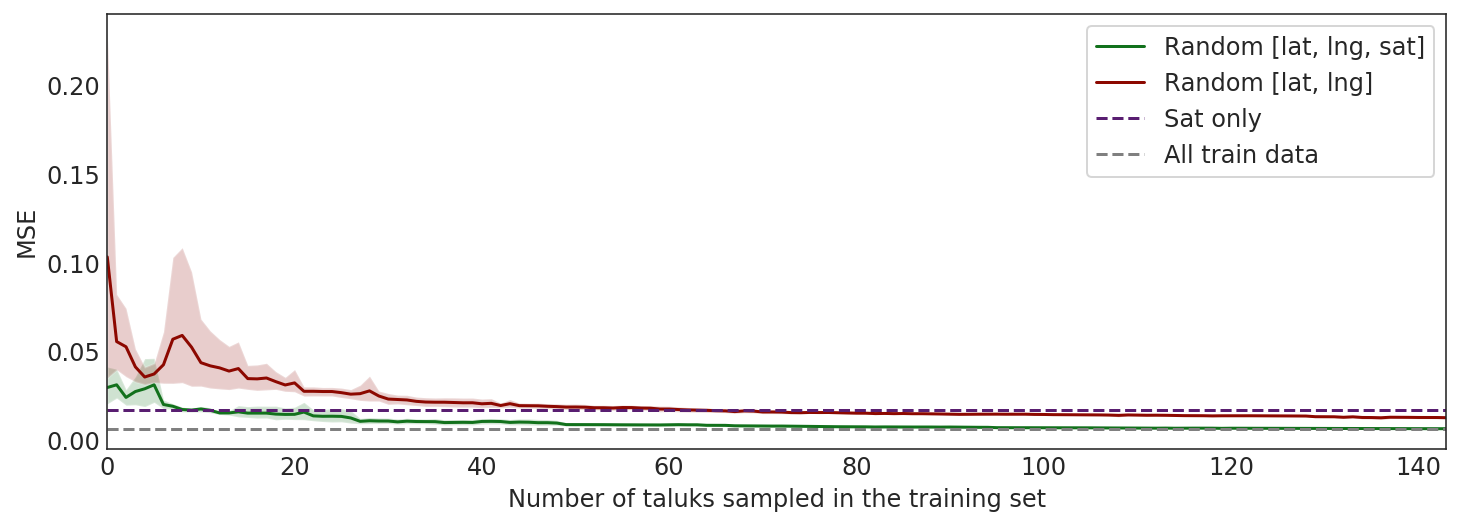

In [128]:
plt.figure(figsize=(12, 4))
# sns.tsplot(greedy_sat.mses_matrix, condition="Greedy GP [lat, lng, sat]", color=plt_colors[0], ci=95)
# sns.tsplot(greedy_nosat.mses_matrix, condition="Greedy GP [lat, lng]", color=plt_colors[1], ci=95)
sns.tsplot(random_sat.mses_matrix, condition="Random [lat, lng, sat]", color=plt_colors[2], ci=95)
sns.tsplot(random_nosat.mses_matrix, condition="Random [lat, lng]", color=plt_colors[3], ci=95)
plt.xlabel("Number of taluks sampled in the training set")
plt.ylabel("MSE")
plt.axhline(mean_squared_error(df_val["true"], df_val["pred"]), ls="--", color=plt_colors[4], label="Sat only")
plt.axhline(opt_mse,ls="--", color="grey", label="All train data")
# plt.ylim(0, 0.01)
plt.legend();

In [129]:
opt_coeff = pearsonr(df["electrification"], df["true"])[0]
sat_coeff = pearsonr(df["electrification"], df["pred"])[0]

In [130]:
print(opt_coeff, sat_coeff)

-0.016977101190905633 0.17059996041024453


In [143]:
N = len(coeff_greedy.coeffs_matrix[0])

In [146]:
se = np.sqrt(1 / (np.arange(N) - 3))

/home/tony/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/tony/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [149]:
se[np.arange(4)] = 1

In [ ]:
plt.figure(figsize=(12, 4))
sns.tsplot(coeff_greedy.coeffs_matrix[0], condition="Greedy, samples only", color=plt_colors[2], ci=95)
sns.tsplot(coeff_greedy.coeffs_matrix[0] + 1.96 * se, condition="Greedy, samples only", color=plt_colors[2], ci=95)
# sns.tsplot(coeff_random.coeffs_matrix, condition="Random, samples only", color=plt_colors[3], ci=95)
plt.xlabel("Number of taluks sampled in the training set")
plt.ylabel("Estimated $\\beta$")
plt.axhline(opt_coeff, ls="--", color="grey", label="True $\\beta$")
plt.axhline(sat_coeff, ls="--", color=plt_colors[4], label="Sat-only $\\beta$")
plt.ylim(-0.5, 1)
plt.title("%s, $R^2$: %.2f, $N$ = %d" % (df_results["state_name"][0], 
                                         r2_score(df_results["true"], df_results["smoothed"]),
                                         len(df_train) + len(df_val)))
plt.legend();

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
